## **Problem Identification**

The price charged to each individual for obtaining health insurance can vary depending on their personal conditions, such as their lifestyle, location of residence, number of dependents, and age.

### **Objectives**

- Identifying the factors that most influence the increase in insurance prices.
- Understanding the effect of age on the insurance that must be paid.
- Understanding the effect of smoking on the insurance that must be paid.
- Understanding the effect of gender on the insurance that must be paid.

## Import Libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import scipy.stats as stats

## Data Loading

In [2]:
df = pd.read_csv('insurance.csv') # set data as df
df.head(10) # display the first 10 datas

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail(10) # display the last 10 datas

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
df.info() # data summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Insight:** This data consist of 7 columns with 1338 datas. The data type are correctly set. 

## Data Cleaning

In [5]:
df.isna().sum() #Check if there any missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Insight:** There is no missing value

In [6]:
print('Total Duplicated Data:', df.duplicated().sum()) #Check Duplicated data

Total Duplicated Data: 1


**Insight:** There is missing value, the missing value should be handled.

In [7]:
# remove duplicated data
df.drop_duplicates(inplace = True)

In [8]:
# check for duplicates
print('Total Duplicated Data After Being Removed:', df.duplicated().sum())
print('Total Data After Duplicated Data is Being Removed:', len(df))

Total Duplicated Data After Being Removed: 0
Total Data After Duplicated Data is Being Removed: 1337


**Insight:** Duplicated data has been removed.

In [9]:
# Check column's name
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Insight:** There is no issue regarding the column's name

In [10]:
cols = df.columns
listItem = [] # Make empty list
for col in cols: # for loop for columns in cols 
  listItem.append([col, df[col].nunique(), df[col].unique()]) # insert columns name as total unique value in the empty list

pd.DataFrame(columns=['Column Name', 'Total Unique Value', 'Unique Value'], data=listItem) # create dataframe from listItem

,Column Name,Total Unique Value,Unique Value
0,age,47,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2..."
1,sex,2,"[female, male]"
2,bmi,548,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4..."
3,children,6,"[0, 1, 3, 2, 5, 4]"
4,smoker,2,"[yes, no]"
5,region,4,"[southwest, southeast, northwest, northeast]"
6,charges,1337,"[16884.924, 1725.5523, 4449.462, 21984.47061, ..."


In [11]:
df.to_csv('insurance_cleaned.csv', index=False) # save cleaned data to csv

## Data Visualization

In [12]:
df1 = pd.read_csv('insurance_cleaned.csv')

In [13]:
data1= df1.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sex', 'smoker', 'region'. 
data1['sex']= label_encoder.fit_transform(data1['sex']) 
data1['smoker']= label_encoder.fit_transform(data1['smoker']) 
data1['region']= label_encoder.fit_transform(data1['region']) 

<Axes: >

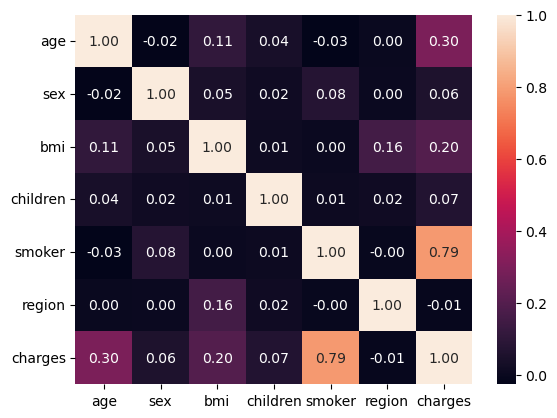

In [14]:
sns.heatmap(data1.corr(), annot= True, fmt= '.2f')

**Insight:** Smoker, Age, and BMI are the most significant factors to the increase of insurance premium charges

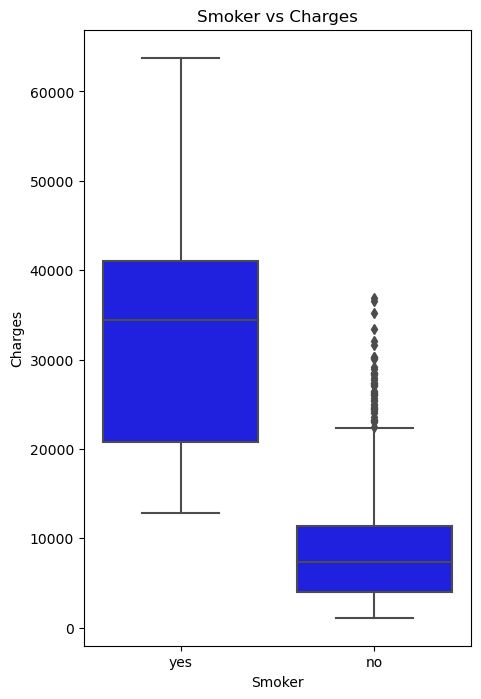

In [15]:
plt.figure(figsize=(5, 8))
sns.boxplot(x='smoker', y='charges', data=df1, color='blue',)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

**Insight:** Smokers are charged with significantly higher prices for their insurance premium that non smokers.

<Axes: xlabel='bmi', ylabel='charges'>

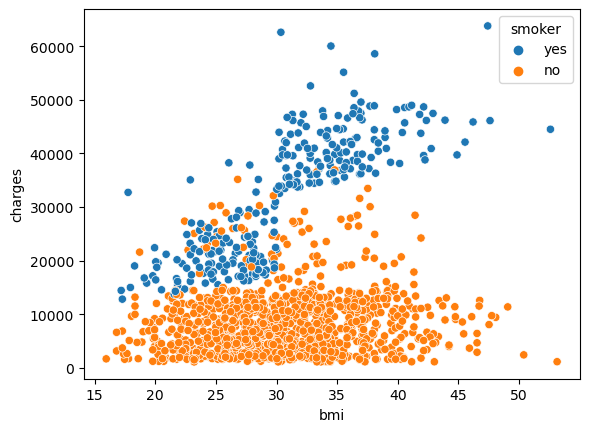

In [16]:
sns.scatterplot(data=df1, x="bmi", y="charges", hue='smoker')

**Insight:** BMI did not show a direct influence to the charged prices, but people who is obese (BMI>30) and also a smoker are charged three to four times higher prices than average. 

<Axes: xlabel='age', ylabel='charges'>

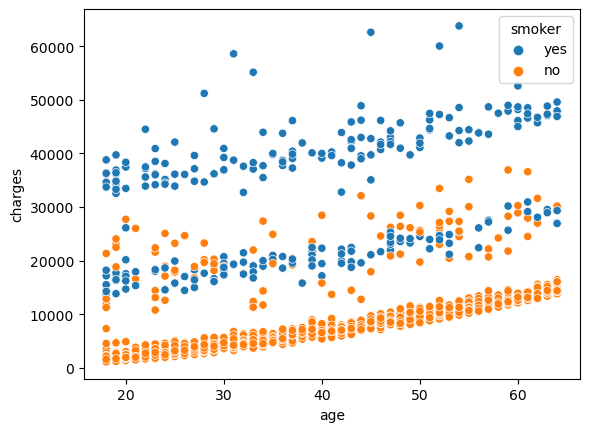

In [19]:
sns.scatterplot(data=df1, x="age", y="charges", hue='smoker')

**Insight:** There is a positive correlation between age and charges.

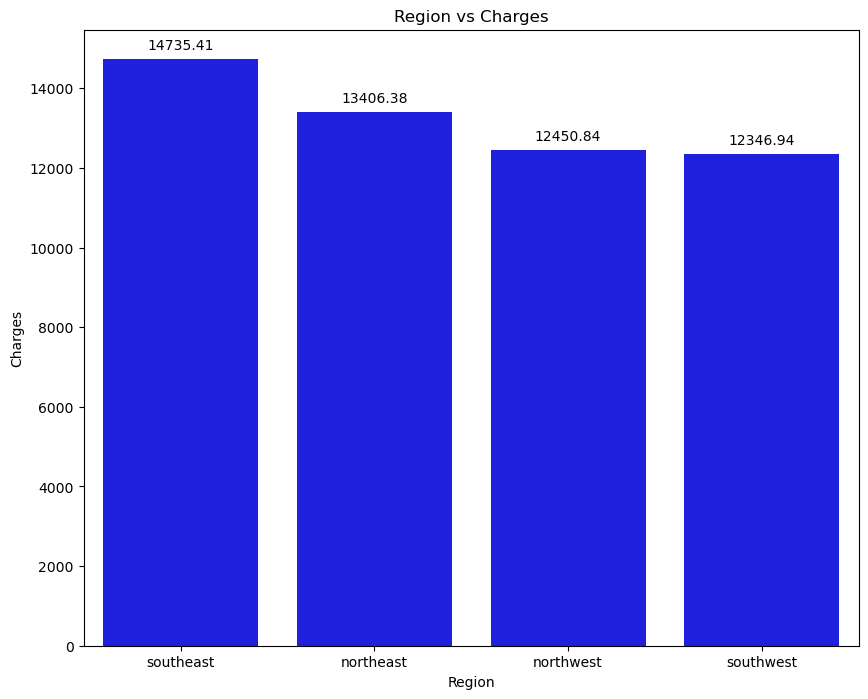

In [38]:
# Calculate mean charges per region
data = df1.groupby(by=['region'])['charges'].mean().sort_values(ascending=False).reset_index()

# Define the size of the plot
plt.figure(figsize=(10, 8))

# Plot the graph using barplot
ax = sns.barplot(x='region', y='charges', data=data, color='blue')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=10)

# Add a title
plt.title('Region vs Charges')

# Set x label
plt.xlabel('Region')

# Set y label
plt.ylabel('Charges')

# Show the plot
plt.show()


**Insight:** People in southeast paid more money for their insurance than people in any other region.

In [36]:
data.columns

Index(['charges'], dtype='object')

In [43]:
## Two-sample dependent test

female = df1[df1['sex'] == 'female']['charges'] # define female in sex column
male = df1[df1['sex'] == 'male']['charges'] # define male in sex column

# calculate tstatistik and pvalue from male and female
t_stat, p_value = stats.ttest_ind(female, male)

# set critical value
alpha = 0.05

# print t statistic value
print(f'T-statistic: {t_stat:.4f}')
# print  p-value
print(f'P-value: {p_value:.4f}')

# check if the p-value less than critical value
if p_value < alpha:
    print("reject null hypothesis: there is a significant difference in charges between male and female.")
else:
    print("failed to reject null hypothesis: there is no significant difference in charges between male and female.")

T-statistic: -2.1244
P-value: 0.0338
reject null hypothesis: there is a significant difference in charges between male and female.


**Insight:** The result of the hypothesis test using the Two-sample dependent test is that the null hypothesis (H0) is rejected, indicating that there is a significant difference in price charges between male and female. Therefore, it can be concluded that gender does not have a significant effect on insurance price.

# **CONCLUSION**

**Key insights:**
1. **The main factor causing differences in the prices charged to someone to purchase insurance is whether they smoke or not.**
1. **Smokers are charged at least 2-4x higher than non smokers.**
2. **There is no difference in the prices charged between men and women.** 
3. **Insurance charged price are even higher for people who smokes and have BMI over 30 (obesity)**